In [3]:
import zipfile
import pandas as pd

# 1. Replace 'archive (7).zip' with the exact name of your downloaded file
zip_path = 'archive (7).zip'

# 2. Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('mall_data') # Extracts into a folder named 'mall_data'

# 3. Load the CSV from the extracted folder
# Note: Check the extracted folder to ensure the filename is 'Mall_Customers.csv'
df = pd.read_csv('mall_data/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Drop CustomerID as it doesn't help clustering
df_cleaned = df.drop(columns=['CustomerID'])

# Select features: Annual Income and Spending Score
# We use .iloc to select columns by index or just call them by name
X = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply StandardScaler for balanced distance calculation [cite: 14]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

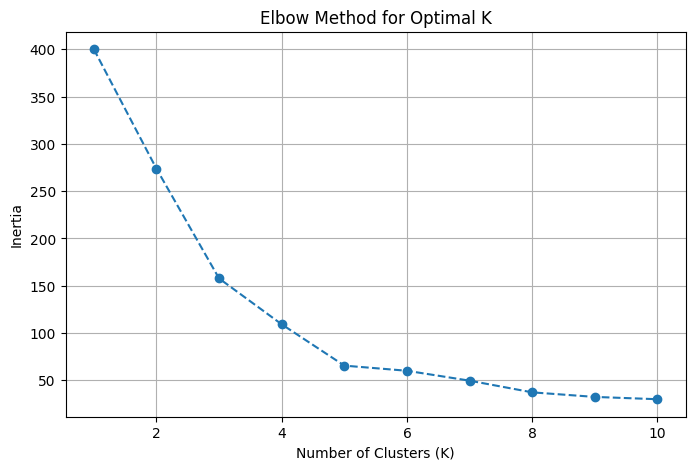

In [5]:
inertia = []
k_range = range(1, 11)

# Run KMeans for multiple values of K [cite: 15]
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_) # Store inertia values [cite: 15]

# Plot elbow curve to decide optimal K [cite: 16]
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [6]:
# 1. Train KMeans with selected K value (K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 2. Add cluster labels back into the original dataset
df['Cluster'] = cluster_labels

# 3. Define a mapping for customer types based on visual analysis
# Note: Cluster numbers (0-4) may vary slightly depending on initialization
# Check the plot below to verify which number corresponds to which behavior
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


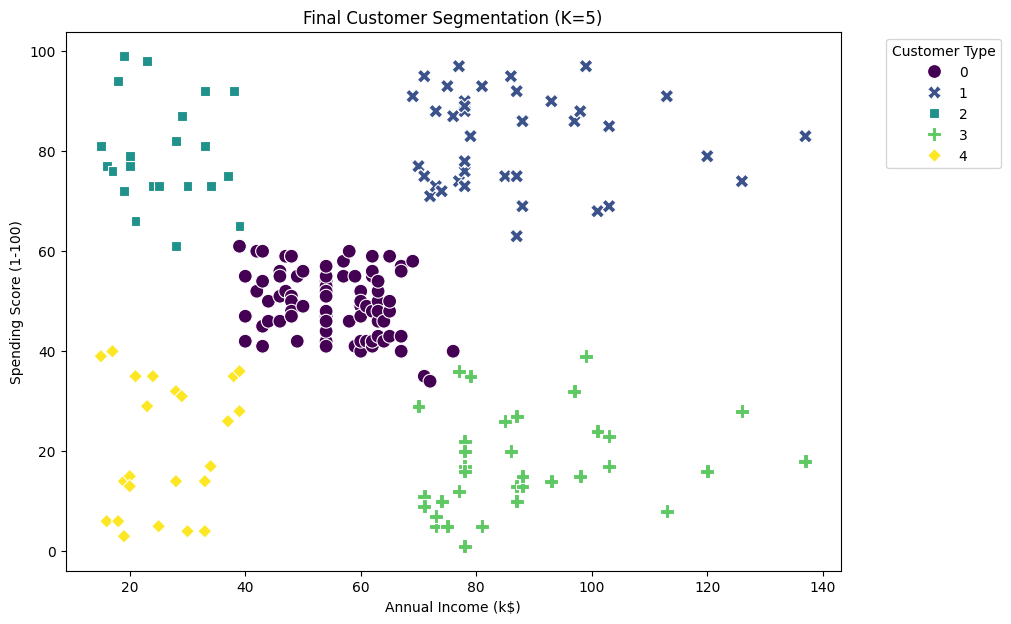

File 'Segmented_Mall_Customers.csv' has been created!


In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    style='Cluster'
)

plt.title('Final Customer Segmentation (K=5)')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Save the segmented dataset as a CSV for delivery
df.to_csv('Segmented_Mall_Customers.csv', index=False)
print("File 'Segmented_Mall_Customers.csv' has been created!")